### Advertisement Campaign - A/B Testing <a class="anchor" id="chapter1"></a>

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

This dataset investigates the impact of displaying ads to a test group compared to a general public service announcement on conversion rates.
Exploratory data analysis (EDA) is conducted by pairing each variable with the conversion status. Visualisations support to indentify patterns and trends in the data.
Following EDA, statistical hypothesis testing is conducted. A chi-squared test of dependence is utilised to assess the relation between categorical variables and the conversion status.

Variable description: 

- Index: Row index
- user id: User ID (unique)
- test group: If "ad" (treatment / experimental group) the person saw the advertisement, if "psa" (control group) they only saw the public service announcement
- converted: If a person bought the product then True, else is False (purchase) - Target variable
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

In [2]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


### 1.) Data Preparation <a class="anchor" id="chapter1"></a>

The following activities are done: 

- Checking for "userid" uniqueness
- Dataframe (df) data type checks and data mannipulation

In [3]:
#Checking for 'user id' duplicates
df.duplicated(subset = 'user id').sum()


0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [6]:
df[['test group', 'converted', 'total ads', 'most ads day', 'most ads hour']].nunique()

test group         2
converted          2
total ads        807
most ads day       7
most ads hour     24
dtype: int64

The dataframe shows 4 categorical variables: test group, converted, most ads day and most ads hour.
Only total ads is numeric.

### 2.) Univariate Analysis <a class="anchor" id="chapter1"></a>

### 2.) a.) Univariate analysis: Test Group <a class="anchor" id="section_5_1"></a>

In [7]:
df['test group'].value_counts().sum()

588101

In [8]:
df['test group'].value_counts()

ad     564577
psa     23524
Name: test group, dtype: int64

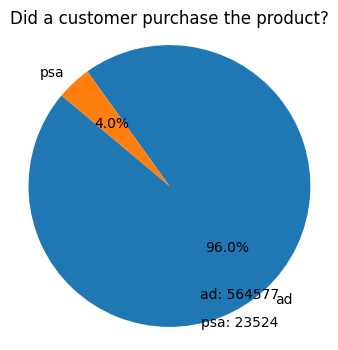

In [9]:
category_counts_testgroup = df['test group'].value_counts()

#Pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_counts_testgroup, labels = category_counts_testgroup.index, autopct='%1.1f%%', startangle=140)
plt.title('Did a customer purchase the product?')
plt.axis('equal')  # ensuring the pie is drawn as a circle

# Adding value_counts 
for i, count in enumerate(category_counts_testgroup):
    plt.text(x=0.5, y=-0.8 - i * 0.2, s=f'{category_counts_testgroup.index[i]}: {count}', ha='center')

plt.show()


The pie chart shows that 96% of users saw an add, whereas only 4% saw public service announcement.

### 2.) b.) Univariate analysis: Converted <a class="anchor" id="section_5_1"></a>

In [10]:
df['converted'].value_counts().sum()

588101

In [11]:
df['converted'].value_counts()

False    573258
True      14843
Name: converted, dtype: int64

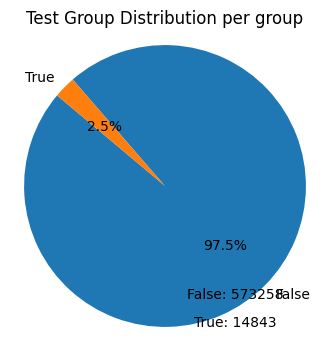

In [12]:
category_counts_converted = df['converted'].value_counts()

#Pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_counts_converted , labels = category_counts_converted .index, autopct='%1.1f%%', startangle=140)
plt.title('Test Group Distribution per group')
plt.axis('equal')  # ensuring the pie is drawn as a circle

# Adding value_counts 
for i, count in enumerate(category_counts_converted ):
    plt.text(x=0.5, y=-0.8 - i * 0.2, s=f'{category_counts_converted.index[i]}: {count}', ha='center')

plt.show()


The chart shows 2.5% of users purchased the product displayed in the ad. On the other hand, 97.5% of users didn't purchase a product displayed in the ad.

### 2.) c.) Univariate analysis: Most ads seen by a person per day<a class="anchor" id="section_5_1"></a>

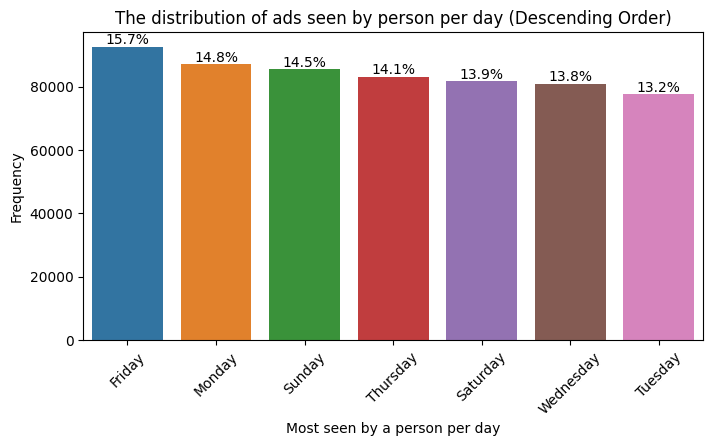

In [13]:
value_counts_most_ads_day = df['most ads day'].value_counts()
most_ads_day_counts_sorted = value_counts_most_ads_day.sort_values(ascending=False)

# Percentage for each category
total_count = most_ads_day_counts_sorted.sum()
percentages = (most_ads_day_counts_sorted / total_count) * 100

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='most ads day', order=most_ads_day_counts_sorted.index)
plt.ylabel('Frequency')
plt.xlabel('Most seen by a person per day')
plt.title('The distribution of ads seen by person per day (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add percentage labels to the bars
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(percentages.iloc[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Most ads were seen by users on Friday, followed by Monday, Sunday, Thursday, Saturday, Wednesday and finally Tuesday.

### 2.) d.) Univariate analysis: Most ads seen by a person per week<a class="anchor" id="section_5_1"></a>

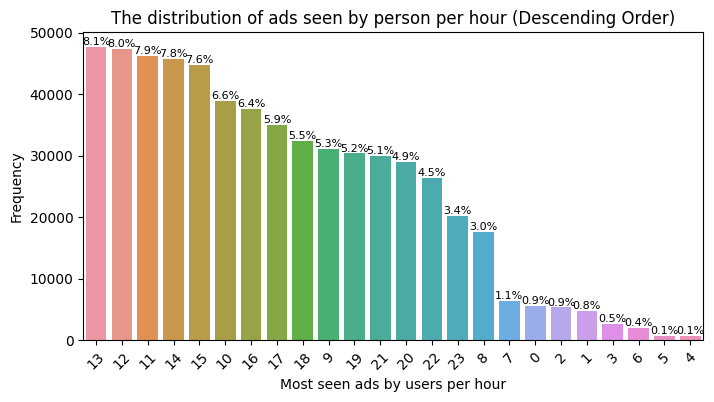

In [14]:
value_counts_most_ads_hour = df['most ads hour'].value_counts()
most_ads_hour_counts_sorted = value_counts_most_ads_hour.sort_values(ascending=False)

# Calculation of the percentage for each hour
total_count = most_ads_hour_counts_sorted.sum()
percentages = (most_ads_hour_counts_sorted / total_count) * 100

#Countplot
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='most ads hour', order=most_ads_hour_counts_sorted.index)
plt.ylabel('Frequency')
plt.xlabel('Most seen ads by users per hour')
plt.title('The distribution of ads seen by person per hour (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add a percentage to the labels 
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(percentages.iloc[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8)  # Set fontsize to 8

plt.show()

The chart shows the distribution of the ads seen by users per hour in a descending order. The time is based on a 24-hour clock. Between 10 a.m. and 3 p.m. user saw most ads. Around 25% of users saw ads around noon, around 27.5% in the afternoon. The viewed as by user decreases from the evening around 18, where only 0.1% see ads at 4 and 5 a.m.

### 2.) e.) Univariate analysis: Total ads<a class="anchor" id="section_5_1"></a>

mount of ads seen by person

In [15]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

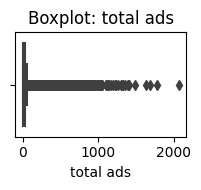

In [16]:
plt.figure(figsize=(4, 2))

plt.subplot(1, 2, 2 )
sns.boxplot(data = df, x = 'total ads')
plt.title('Boxplot: total ads')

plt.tight_layout()
plt.show()

Total ads shows skewness. 

### 3.) Bivariate Analysis <a class="anchor" id="chapter1"></a>

### 3.) a.) Test Group <a class="anchor" id="section_5_1"></a>

In [17]:
converted_counts_testgroup = df.groupby('test group')['converted'].value_counts()
converted_counts_testgroup 

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: converted, dtype: int64

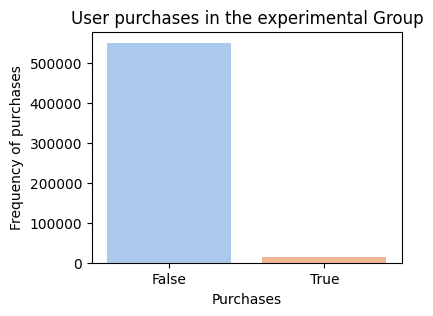

Text(0, 0.5, 'Frequency of purchases')

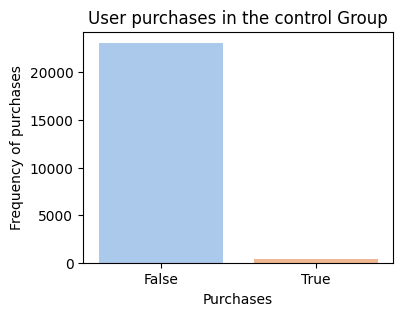

In [18]:
# Plot experimental group

plt.figure(figsize=(4, 3))
sns.countplot(data=df[df['test group'] == 'ad'], x='converted', palette='pastel')
plt.title('User purchases in the experimental Group')
plt.xlabel('Purchases')
plt.ylabel('Frequency of purchases')
plt.show()

# Plot control group
plt.figure(figsize=(4, 3))
sns.countplot(data=df[df['test group'] == 'psa'], x='converted', palette='pastel')
plt.title('User purchases in the control Group')
plt.xlabel('Purchases')
plt.ylabel('Frequency of purchases')
### 3.) a.) Test Group <a class="anchor" id="section_5_1"></a>plt.show()

### 3.) a.) The relation between the total ads seen and a purchased product by test group <a class="anchor" id="section_5_1"></a>

<AxesSubplot: xlabel='converted', ylabel='total ads'>

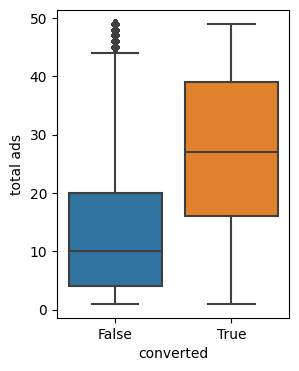

In [19]:
plt.figure(figsize=(3, 4))
sns.boxplot(y = 'total ads', x = 'converted', data = df[df['total ads'] < 50])

Total ads shows outliers. For a closer visualisation into the distribution, the interval is set to 50. Users who didn't convert show a median of 10. On the other side, user saw is around 25 ads to convert. The visual shows the more ads are shown to users, the more conversion there is.

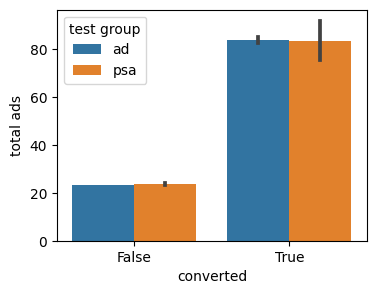

In [20]:
#Calculation of relative proportion
test_group_counts = df['test group'].value_counts(normalize = True) * 100
plt.figure(figsize=(4, 3))
sns.barplot(data = df , x = 'converted', y = 'total ads', hue = 'test group')

plt.show()

The chart shows the relationship between "test group" (ad or psa), the "converted" variable (indicating whether a user made a purchase), and the total number of ads seen.

(1) Test Group Comparison: The bars represent the two test groups : "ad" (blue / experimental group) and "psa" (orange / control group). The heights of the bars indicate the total number of ads seen by users in each test group.

(2) Conversion Rate:
Within each test group, the bars are further divided into two segments: "False" and "True", indicating whether the user made a purchase (True) or not (False) after seeing the ad.

The chart suggests that the "ad" / experimental test group (blue) has higher proportion of users who made a purchase ("True") compared to the "psa" / control group test group (orange). This indicates that users who saw the ad were more likely to make a purchase compared to those who saw the public service announcement.
Please note: the chart visualises the relative proportions of the two test groups with respect to the total number of ads seen. The "ad" test group appears to have a larger proportion compared to the "psa" test group.

### 3.) b.) Frequency of purchase between test groups <a class="anchor" id="section_5_1"></a> 

In [21]:
crosstab_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index') *100
crosstab_conversion_test_group

converted,False,True
test group,,
ad,97.445344,2.554656
psa,98.214589,1.785411


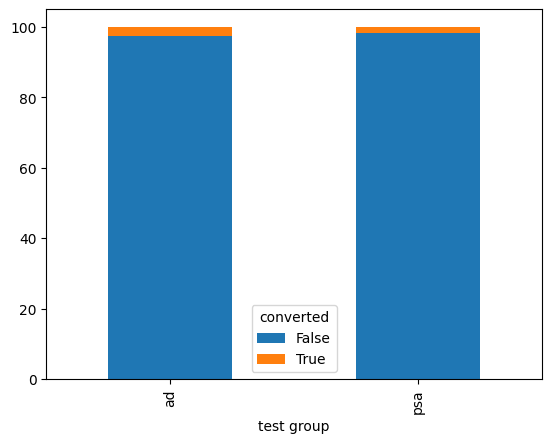

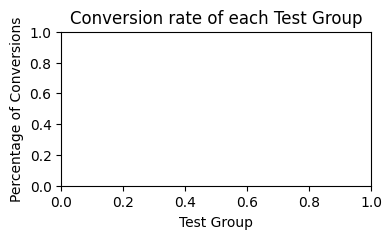

In [22]:
crosstab_conversion_test_group.plot(kind='bar', stacked=True)
plt.figure(figsize=(4, 2))
plt.title('Conversion rate of each Test Group')
plt.xlabel('Test Group')
plt.ylabel('Percentage of Conversions')
plt.show()

Of the users that saw the ad, around 2.55% made a purchase. The control group who saw general public ads, only 1.79% purchased.

### 3.) c.) The distribution of ads seen per day and conversion  <a class="anchor" id="section_5_1"></a> 

In [23]:
crosstab_day_conversion = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index') *100
crosstab_day_conversion_sorted = crosstab_day_conversion.sort_values(by=crosstab_day_conversion.columns[1], ascending=False)
crosstab_day_conversion_sorted

converted,False,True
most ads day,,
Monday,96.718845,3.281155
Tuesday,97.015966,2.984034
Wednesday,97.505809,2.494191
Sunday,97.552435,2.447565
Friday,97.778810,2.221190
Thursday,97.842906,2.157094
Saturday,97.894930,2.105070


<AxesSubplot: xlabel='most ads day'>

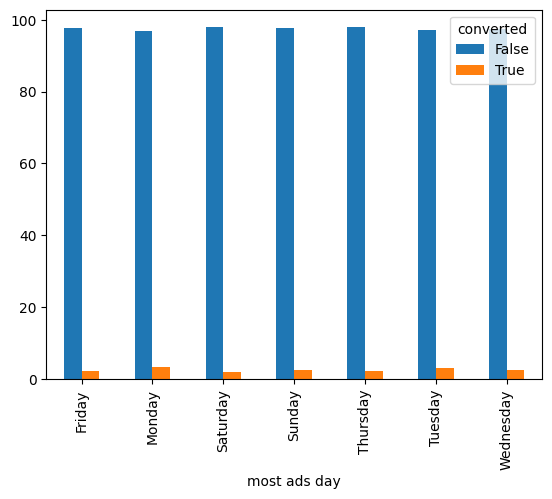

In [24]:
crosstab_day_conversion.plot.bar()

In a descending order, Monday to Wednesday show highest conversion rates. Saturday shows the lowest conversion rate.

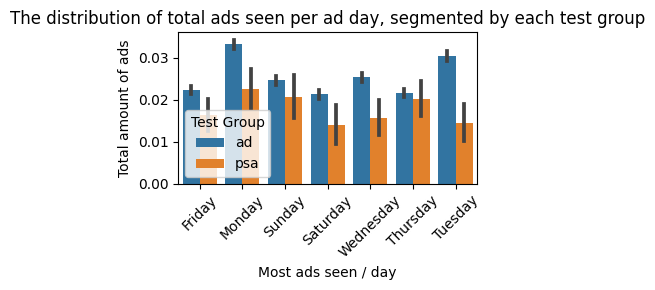

In [25]:
test_group_counts = df['test group'].value_counts(normalize = True) * 100

# Sort the most ads days by the descending order of total ads seen
desc_order = df.groupby('most ads day')['total ads'].sum().sort_values(ascending=False).index

# Plot the barplot
plt.figure(figsize=(4, 3))
sns.barplot(data=df, x='most ads day', y='converted', hue='test group', order=desc_order)
plt.title('The distribution of total ads seen per ad day, segmented by each test group')
plt.xlabel('Most ads seen / day')
plt.ylabel('Total amount of ads')
plt.legend(title='Test Group')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The chart provides insights into the distribution of total ads seen per ad day. It is highlighting variations between different days of the week and differences in performance between the "ad" and "psa" test groups.

(1) Variation Across Days:
The total amount of ads seen varies across different days of the week. For example, the highest total amount of ads is on Saturday for the Control Group and Friday for the experimental group. 

(2) Comparison Between Test Groups:
Both test groups show fluctuations in the total amount of ads seen across different days.
On most days, the "ad" test group tends to have a higher total amount of ads seen compared to the "psa" test group. However, this trend is not consistent across all days.


### 3.) d.) The distribution of total ads seen per hour and conversion <a class="anchor" id="section_5_1"></a>

In [26]:
crosstab_hour_conversion = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index') *100
crosstab_hour_conversion_sorted = crosstab_hour_conversion.sort_values(by=crosstab_hour_conversion.columns[1], ascending=False)
crosstab_hour_conversion_sorted

converted,False,True
most ads hour,,
16,96.922831,3.077169
20,97.019673,2.980327
15,97.034666,2.965334
21,97.107686,2.892314
17,97.179033,2.820967
14,97.193743,2.806257
18,97.262012,2.737988
19,97.328018,2.671982
22,97.389528,2.610472


<AxesSubplot: xlabel='most ads hour'>

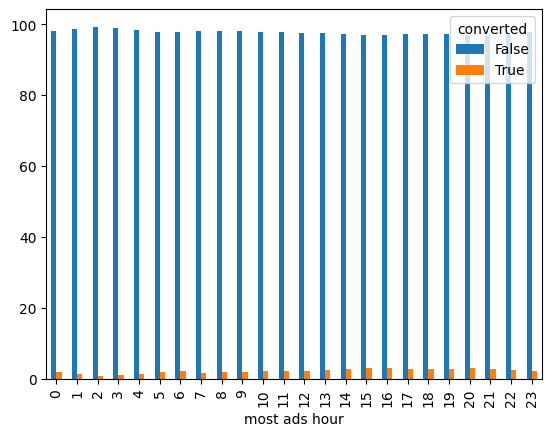

In [27]:
crosstab_hour_conversion.plot.bar()

Most purchases were made between 14-16 in the afternoon and 20-21 in the evening. The lowest conversion rate is in the night between 1-4 a.m.

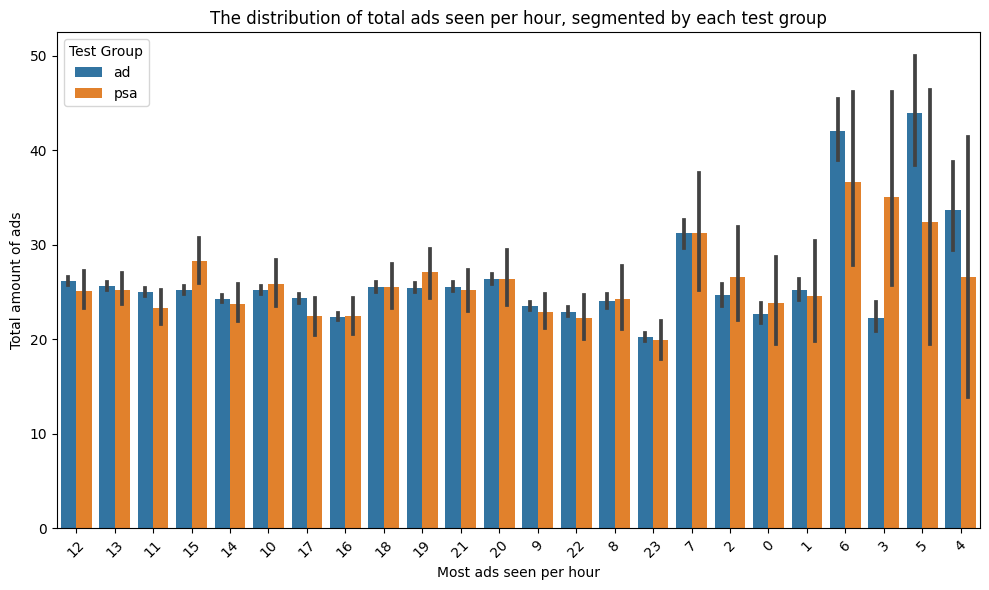

In [28]:
#Calculating the proportion
test_group_counts = df['test group'].value_counts(normalize = True) * 100

# Sort the most ads per hour by the descending order of total ads seen
desc_order = df.groupby('most ads hour')['total ads'].sum().sort_values(ascending=False).index

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='most ads hour', y='total ads', hue='test group', order = desc_order)
plt.title('The distribution of total ads seen per hour, segmented by each test group')
plt.xlabel('Most ads seen per hour')
plt.ylabel('Total amount of ads')
plt.legend(title='Test Group')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

This chart illustrates the distribution of the total amount of ads seen per hour, segmented by each test group. The total amount of ads seen varies throughout the day, with fluctuations in different hours. Some hours show differences between the two test groups. For example, in the early morning hours (e.g., 1 a.m., 2 a.m.), the "ad" test group shows an increase in the total amount of ads seen compared to the "psa" test group. Similarly, in the late afternoon and evening hours (e.g., 5 p.m. - 7 p.m. ), the "psa" test group tends to have higher total amounts of ads seen compared to the "ad" test group.

Summary: Bivariate key take aways
- (1) The experimental group (ad) makes 96% of the sample size, whereas the control group (psa) makes 4% of the sample size.
- (2) The control group who saw general public ads, 1.79% made a purchase. On the other hand, around 2.55% of the experimental group made a purchase.

### 4.) Statistical Analysis <a class="anchor" id="chapter1"></a>

### 4.) a.) Hypothesis Testing using Chi-Squared of Independence <a class="anchor" id="section_5_1"></a> 

The bivariate analysis visually indicated there are differences in conversion rate between categorical variables. The Chi-Square tests tests statistical significance. 
The Chi-Sqaure Test for test group and converted show a p-value less than 0.05. This means there is statistical significance for users who saw the ad vs. for users who did not see the ad. Furthermore, ads day vs. converted show a p-value smaller than 0.05 to. Consequently, we can conclude that the day ads are shown to users is relevant. Last, also the hour the ad is shown to users makes a statistical significant difference.

In [30]:
from scipy.stats import chi2_contingency

# Define the contingency table
contingency_table = pd.crosstab(index=df['test group'], columns=df['converted'])

# Perform chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
# Print results
print("Chi-square test for independence:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Check if the p-value is less than alpha
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between test group and conversion.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between test group and conversion.")

Chi-square test for independence:
Chi-square statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Reject the null hypothesis: There is a significant relationship between test group and conversion.


### Insight Summary

The dataset consists of 588.101 observations, with the majority belonging to the 'ad' test group (564.577 observations).
A significant proportion of observations did not result in conversion, with 573.258 instances of 'False' compared to 14.843 instances of 'True'.
The average number of total ads displayed is around 24.82, with a wide range of values observed. Visualisations show insights into the frequency of purchases, conversion rates across different days, and conversion rates at various hours of the day. The chi-square test for independence indicated a significant relation between the test group and conversion status.

The 'ad' test (experimental) group dominates the dataset, suggesting a larger focus on ad-based campaigns compared to public service announcements (PSAs, control group) for future research. Despite the majority of observations resulting in non-conversion, there is still a notable proportion of conversions observed. The average number of total ads displayed provides context for the volume of ad exposure experienced by users. Conversion rates vary across different days and hours, indicating potential patterns in user behavior.

### Conclusion and recommendation for future research

The dataset provides valuable insights into the relation between test group and conversion.
The significant relation between the test group and conversion status suggests that the type of ad campaign employed may impact conversion outcomes. Further analysis are recommended to explore the underlying factors driving conversion and optimise ad strategies accordingly. Also, future research could delve deeper into the specific characteristics of successful ad campaigns within the test group, such as ad content, targeting strategies, and timing. For example, the effectiveness of different ad formats (e.g., video ads, display ads) and marketing channels (e.g., social media, search) could be investigated to provide additional insights into optimising conversion rates.
Furthermore, longitudinal studies tracking conversion rates over time could help assess the sustainability of ad effectiveness and identify potential trends or seasonality effects. Also qualitative research methods, such as user surveys or focus groups, could complement quantitative analyses by providing insights into user preferences, motivations, and behaviours.